## 30 Novios de Diana Proceso
#1. Webscrapear nombres de actores, sus fotos y sus edades
#2. Con la api, crear un bucle que use la API para obtener el lovePercentage con Diana y todos los nombres de actores
#3. Guardar los resultados dataframe 
#4. Streamlit

# WebScrapping 


In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import streamlit as st
import pandas as pd
from streamlit_extras.let_it_rain import rain

url = "https://www.okchicas.com/tu/hombres/actores-menores-de-45-guapos/"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")


/Users/regina/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [80]:
pip install streamlit.components.v1

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement streamlit.components.v1 (from versions: none)
ERROR: No matching distribution found for streamlit.components.v1
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [63]:
#obtener los nombres de los actores
soup.find_all("h2")
lista_actores = soup.find_all("h2")
lista_actores

#eliminar el "1." de cada nombre
lista_actores = [actor.text[3:] for actor in lista_actores]
lista_actores

#eliminar el espacio " " al principio de los nombres que tengan ese espacio
lista_actores = [actor[1:] if actor[0] == " " else actor for actor in lista_actores]

#eliminar el último elemento de la lista
lista_actores = lista_actores[:-1]
lista_actores




['Theo James',
 'Aaron Taylor-Johnson',
 'Liam Hemsworth',
 'Tyler Hoechlin',
 'Robert Pattinson',
 'Tom Hardy',
 'Justin Baldoni',
 'Chris Hemsworth',
 'Martiño Rivas',
 'Tom Ellis',
 'Alexander Skarsgård',
 'Michael Fassbender',
 'Tom Hiddleston',
 'Evan Peters',
 'Michele Morrone',
 'Henry Cavill',
 'Jake Gyllenhaal',
 'Richard Madden',
 'Sam Claflin',
 'Mario Casas',
 'Jamie Dornan',
 'Sam Heughan',
 'Sebastian Stan',
 'Ryan Gosling',
 'Charlie Hunnam',
 'Chris Evans',
 'Yon Gonzalez',
 'Jason Momoa',
 'Joe Manganiello',
 'Travis Fimmel']

In [64]:
#obtener la edad de los actores
import re 
soup.find_all("div", class_="entry-content", itemprop="text")[0].find_all("p")
#sacar todos los números antes de "años" "añitos"
todoslosparrafos = soup.find_all("div", class_="entry-content", itemprop="text")[0].find_all("p")
todoslosparrafos
#siguiente paso, asilar los números de los textos
pattern = r"(\d{1,2})\s*(años|añitos)"
edades = []
for p in todoslosparrafos:
    texto = p.get_text()  # Extrae el texto del Tag
    edad = re.findall(pattern, texto)  # Aplica la expresión regular al texto
    if edad:
        edades.append(edad[0][0])

edades
#oops, a Tom Hiddleston no le pusieron "40 años" si no "cuarto piso"

edades.insert(12, '40')
 #oops mismo error para la posición 22
# Inserta el valor 40 en la posición 22 (índice 21)
edades.insert(21, '40')
#oops a . Travis Fimmel le pusieron "41 añotes"
# Añade '41' al final de la lista
edades.append('41')
edades


['37',
 '30',
 '31',
 '33',
 '35',
 '44',
 '37',
 '37',
 '36',
 '42',
 '44',
 '44',
 '40',
 '34',
 '30',
 '38',
 '41',
 '34',
 '35',
 '34',
 '38',
 '40',
 '38',
 '40',
 '40',
 '40',
 '34',
 '41',
 '45',
 '41']

In [65]:
#obtener las imagenes de los actores 
# Extraer todos los párrafos con imágenes
parrafos_con_imagenes = soup.find_all("div", class_="entry-content", itemprop="text")[0].find_all("p")

# Lista para almacenar las URLs de las imágenes
urls_imagenes_p = []

# Buscar las imágenes dentro de los párrafos
for p in parrafos_con_imagenes:
    # Si el párrafo contiene una etiqueta <img>
    img_tag = p.find('img')
    if img_tag and 'src' in img_tag.attrs:
        # Verificar que la imagen tiene la extensión .png
        if img_tag['src'].endswith('.png'):
            urls_imagenes_p.append(img_tag['src'])

# Mostrar las URLs de las imágenes .png
print(urls_imagenes_p)
# PREPARATE PARA VER 30 HOMBRES GUAPOS
# ver imagenes# ! New library to display images
from IPython.display import Image

# Lista de URLs de las imágenes (por ejemplo, las que obtuviste previamente)
urls_imagenes_p
# Mostrar las imágenes
for url in urls_imagenes_p:
    display(Image(url=url))


['https://www.okchicas.com/wp-content/uploads/2021/04/actores-menores-de-45-guapos-atractivos-628x700.png', 'https://www.okchicas.com/wp-content/uploads/2021/04/actores-menores-de-45-guapos-atractivos-2-628x700.png', 'https://www.okchicas.com/wp-content/uploads/2021/04/actores-menores-de-45-guapos-atractivos-3-628x700.png', 'https://www.okchicas.com/wp-content/uploads/2021/04/actores-menores-de-45-guapos-atractivos-4-628x700.png', 'https://www.okchicas.com/wp-content/uploads/2021/04/actores-menores-de-45-guapos-atractivos-5-628x700.png', 'https://www.okchicas.com/wp-content/uploads/2021/04/actores-menores-de-45-guapos-atractivos-6-628x700.png', 'https://www.okchicas.com/wp-content/uploads/2021/04/actores-menores-de-45-guapos-atractivos-7-628x700.png', 'https://www.okchicas.com/wp-content/uploads/2021/04/actores-menores-de-45-guapos-atractivos-8-628x700.png', 'https://www.okchicas.com/wp-content/uploads/2021/04/actores-menores-de-45-guapos-atractivos-9-627x700.png', 'https://www.okchica

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Nombre  30 non-null     object
 1   Edad    30 non-null     int64 
 2   Imagen  30 non-null     object
dtypes: int64(1), object(2)
memory usage: 848.0+ bytes


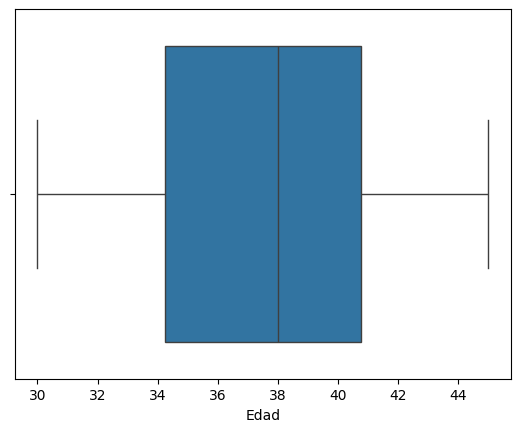

In [66]:


#juntar nombres, edades e imagenes en un dataframe
hombres_guapos = pd.DataFrame({
    "Nombre": lista_actores,
    "Edad": edades,
    "Imagen": urls_imagenes_p
})


#cambiar edad a numero 
hombres_guapos["Edad"] = hombres_guapos["Edad"].astype(int)
#cambiar nombre a string
hombres_guapos["Nombre"] = hombres_guapos["Nombre"].astype(str)
#EDA 
hombres_guapos.info()
hombres_guapos.describe()
hombres_guapos.head()
hombres_guapos.tail()

# boxplot de edades
# instalar seaborn
#import sys
#!{sys.executable} -m pip install seaborn

#import sys
#!{sys.executable} -m pip install matplotlib

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=hombres_guapos, x="Edad")
plt.show()


In [67]:
# Función para corregir los nombres
def corregir_nombre(nombre):
    # Eliminar caracteres no permitidos (como guiones, comas, etc.)
    nombre_corregido = re.sub(r'[^A-Za-z ]', '', nombre)
    return nombre_corregido

# Aplicar la corrección a la columna "Nombre" sin cambiar el orden
hombres_guapos["Nombre"] = hombres_guapos["Nombre"].apply(corregir_nombre)
hombres_guapos

,Nombre,Edad,Imagen
0,Theo James,37,https://www.okchicas.com/wp-content/uploads/20...
1,Aaron TaylorJohnson,30,https://www.okchicas.com/wp-content/uploads/20...
2,Liam Hemsworth,31,https://www.okchicas.com/wp-content/uploads/20...
3,Tyler Hoechlin,33,https://www.okchicas.com/wp-content/uploads/20...
4,Robert Pattinson,35,https://www.okchicas.com/wp-content/uploads/20...
5,Tom Hardy,44,https://www.okchicas.com/wp-content/uploads/20...
6,Justin Baldoni,37,https://www.okchicas.com/wp-content/uploads/20...
7,Chris Hemsworth,37,https://www.okchicas.com/wp-content/uploads/20...
8,Martio Rivas,36,https://www.okchicas.com/wp-content/uploads/20...
9,Tom Ellis,42,https://www.okchicas.com/wp-content/uploads/20...


In [68]:
hombres_guapos

,Nombre,Edad,Imagen
0,Theo James,37,https://www.okchicas.com/wp-content/uploads/20...
1,Aaron TaylorJohnson,30,https://www.okchicas.com/wp-content/uploads/20...
2,Liam Hemsworth,31,https://www.okchicas.com/wp-content/uploads/20...
3,Tyler Hoechlin,33,https://www.okchicas.com/wp-content/uploads/20...
4,Robert Pattinson,35,https://www.okchicas.com/wp-content/uploads/20...
5,Tom Hardy,44,https://www.okchicas.com/wp-content/uploads/20...
6,Justin Baldoni,37,https://www.okchicas.com/wp-content/uploads/20...
7,Chris Hemsworth,37,https://www.okchicas.com/wp-content/uploads/20...
8,Martio Rivas,36,https://www.okchicas.com/wp-content/uploads/20...
9,Tom Ellis,42,https://www.okchicas.com/wp-content/uploads/20...


# Conectar a Api para obtener compatibilidad

In [69]:
key = "edc250de13mshd7b5c8303b11655p13d9e8jsn4a57037e62a9" #modificar con tu llave

In [70]:
#Explicación del código:
#hacemos un loop para cada nombre de la lista de actores
#creamos un diccionario con los nombres de las personas a comparar
#hacemos una petición GET al API con los nombres de las personas a comparar
#si la petición es exitosa, guardamos la respuesta en formato JSON
#verificamos si la respuesta contiene el campo 'lovePercentage'
#si 'lovePercentage' existe, eliminamos el '%' y lo convertimos en un número
#guardamos los resultados en un diccionario
#convertimos la lista de resultados en un DataFrame
#mostramos el DataFrame resultante

url = "https://love-compatibility-calculator-api-apiverve.p.rapidapi.com/v1/lovecalculator"  # Conéctate al API
headers = {
    "Accept": "application/json",
    "x-rapidapi-host": "love-compatibility-calculator-api-apiverve.p.rapidapi.com",
    "x-rapidapi-key": key  
}

# Lista para almacenar los resultados
compatibilidad = []

# Bucle para recorrer los nombres de los actores
for nombre in hombres_guapos["Nombre"]:  
    params = {  # Aquí se está creando un diccionario con las claves
        "name1": "Diana", #aquí podrías poner tu nombre
        "name2": nombre
    }
    
    response = requests.get(url, headers=headers, params=params)
    
    if response.status_code == 200:  # Si todo está bien
        data = response.json()  # Guarda la respuesta en formato JSON
        
        # Verifica si la respuesta contiene el campo 'lovePercentage'
        love_percentage = data.get("data", {}).get("lovePercentage")
        
        # Si lovePercentage existe, eliminamos el '%' y lo convertimos en un número, tuvimos k hacer esto xq no nos permitia guardrlo correctamente
        if love_percentage:
            love_percentage = love_percentage.replace('%', '')  # Elimina el '%'
            try:
                love_percentage = int(love_percentage)  # Convierte a entero
                love_percentage = f"{love_percentage}%"  # Vuelve a agregar el '%'
            except ValueError:
                love_percentage = None  # Si no puede convertir, asignamos None
        else:
            love_percentage = None
        
        # Guarda los resultados en un diccionario
        compatibilidad.append({"Diana": "Diana", "Actor": nombre, "Compatibilidad": love_percentage})
    else:
        print(f"Error {response.status_code}: {response.text}")

# Convertimos la lista de resultados en un DataFrame
compatibilidad_res = pd.DataFrame(compatibilidad)

# Mostramos el DataFrame resultante
print(compatibilidad_res)

#ya funciona!! 

    Diana                Actor Compatibilidad
0   Diana           Theo James            83%
1   Diana  Aaron TaylorJohnson            85%
2   Diana       Liam Hemsworth            83%
3   Diana       Tyler Hoechlin            95%
4   Diana     Robert Pattinson            63%
5   Diana            Tom Hardy            71%
6   Diana       Justin Baldoni            72%
7   Diana      Chris Hemsworth            92%
8   Diana         Martio Rivas            82%
9   Diana            Tom Ellis            74%
10  Diana   Alexander Skarsgrd            53%
11  Diana   Michael Fassbender            94%
12  Diana       Tom Hiddleston            84%
13  Diana          Evan Peters            54%
14  Diana      Michele Morrone            56%
15  Diana         Henry Cavill            74%
16  Diana      Jake Gyllenhaal            75%
17  Diana       Richard Madden            81%
18  Diana          Sam Claflin            52%
19  Diana          Mario Casas            61%
20  Diana         Jamie Dornan    

In [71]:
#unimos el data frame hombres_guapos con el de  compatibilidad_res por medio de los nombres de actor
#cambiamos el nombre de la columna "Actor" a "Nombre" para que coincida con el df hombres_guapos
compatibilidad_res = compatibilidad_res.rename(columns={"Actor": "Nombre"})
#unimos los dataframes
Novios_Diana = pd.merge(hombres_guapos, compatibilidad_res, on="Nombre")

#eliminamos la columna Diana 
Novios_Diana = Novios_Diana.drop(columns="Diana")

#quiero que la columna después de Nombre sea la de compatibilidad
columnas = Novios_Diana.columns.tolist()
columnas
columnas = ["Nombre", "Compatibilidad", "Edad", "Imagen"]
columnas
Novios_Diana = Novios_Diana[columnas]
Novios_Diana

,Nombre,Compatibilidad,Edad,Imagen
0,Theo James,83%,37,https://www.okchicas.com/wp-content/uploads/20...
1,Aaron TaylorJohnson,85%,30,https://www.okchicas.com/wp-content/uploads/20...
2,Liam Hemsworth,83%,31,https://www.okchicas.com/wp-content/uploads/20...
3,Tyler Hoechlin,95%,33,https://www.okchicas.com/wp-content/uploads/20...
4,Robert Pattinson,63%,35,https://www.okchicas.com/wp-content/uploads/20...
5,Tom Hardy,71%,44,https://www.okchicas.com/wp-content/uploads/20...
6,Justin Baldoni,72%,37,https://www.okchicas.com/wp-content/uploads/20...
7,Chris Hemsworth,92%,37,https://www.okchicas.com/wp-content/uploads/20...
8,Martio Rivas,82%,36,https://www.okchicas.com/wp-content/uploads/20...
9,Tom Ellis,74%,42,https://www.okchicas.com/wp-content/uploads/20...


In [72]:
#crear una columna llamada Compatibilidad_num que copie Compatibilidad pero sea formaot numero
Novios_Diana['Compatibilidad_num'] = Novios_Diana['Compatibilidad'].replace('%', '', regex=True).astype(float) 
Novios_Diana


,Nombre,Compatibilidad,Edad,Imagen,Compatibilidad_num
0,Theo James,83%,37,https://www.okchicas.com/wp-content/uploads/20...,83.0
1,Aaron TaylorJohnson,85%,30,https://www.okchicas.com/wp-content/uploads/20...,85.0
2,Liam Hemsworth,83%,31,https://www.okchicas.com/wp-content/uploads/20...,83.0
3,Tyler Hoechlin,95%,33,https://www.okchicas.com/wp-content/uploads/20...,95.0
4,Robert Pattinson,63%,35,https://www.okchicas.com/wp-content/uploads/20...,63.0
5,Tom Hardy,71%,44,https://www.okchicas.com/wp-content/uploads/20...,71.0
6,Justin Baldoni,72%,37,https://www.okchicas.com/wp-content/uploads/20...,72.0
7,Chris Hemsworth,92%,37,https://www.okchicas.com/wp-content/uploads/20...,92.0
8,Martio Rivas,82%,36,https://www.okchicas.com/wp-content/uploads/20...,82.0
9,Tom Ellis,74%,42,https://www.okchicas.com/wp-content/uploads/20...,74.0


In [77]:

#EDA de compatibilidad
Novios_Diana.info("Compatibilidad_num")
min  = Novios_Diana["Compatibilidad_num"].min()
#max
max = Novios_Diana["Compatibilidad_num"].max()
#dividiendo en cuartiles
Novios_Diana["Compatibilidad_num"].quantile([0.25, 0.5, 0.75])
min
max

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Nombre              30 non-null     object 
 1   Compatibilidad      30 non-null     object 
 2   Edad                30 non-null     int64  
 3   Imagen              30 non-null     object 
 4   Compatibilidad_num  30 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.3+ KB


np.float64(95.0)

In [79]:
max

np.float64(95.0)

In [74]:
guardar_resultado_api = compatibilidad_res


In [75]:
# Guardar el DataFrame en un archivo CSV
Novios_Diana.to_csv('compatibilidad_diana2.csv', index=False)
